# Question 4

In [ ]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [ ]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [ ]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          image: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """
    # Define the ratio of salt to pepper and the total amount of noise
    salt_pepper_ratio = 0.5
    amount = 0.04

    # Copy the input image to avoid overwriting the original image
    noisy_img = np.copy(img)

    # Calculate the number of pixels to alter
    num_salt = np.ceil(amount * img.size * salt_pepper_ratio)
    num_pepper = np.ceil(amount * img.size * (1.0 - salt_pepper_ratio))

    # Add salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    noisy_img[tuple(coords)] = 255

    # Add pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    noisy_img[tuple(coords)] = 0

    return noisy_img

(-0.5, 374.5, 499.5, -0.5)

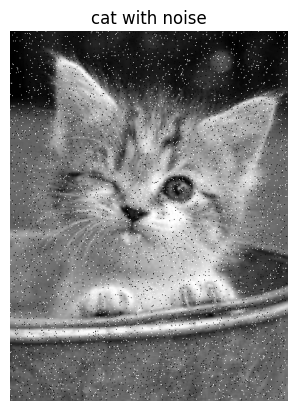

In [ ]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [ ]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  #######################
  #    your code here   #
  #######################
  pad_size = filter_size // 2
  padded_img = np.zeros((img.shape[0] + 2 * pad_size, img.shape[1] + 2 * pad_size), dtype=img.dtype)

  # Center of the new image
  padded_img[pad_size:-pad_size, pad_size:-pad_size] = img

  # Edges
  padded_img[pad_size:-pad_size, :pad_size] = img[:, :pad_size][:, ::-1]  # Left
  padded_img[pad_size:-pad_size, -pad_size:] = img[:, -pad_size:][:, ::-1]  # Right
  padded_img[:pad_size, pad_size:-pad_size] = img[:pad_size, :][::-1, :]  # Top
  padded_img[-pad_size:, pad_size:-pad_size] = img[-pad_size:, :][::-1, :]  # Bottom

  # Corners
  padded_img[:pad_size, :pad_size] = img[:pad_size, :pad_size][::-1, ::-1]  # Top-left
  padded_img[-pad_size:, :pad_size] = img[-pad_size:, :pad_size][::-1, ::-1]  # Bottom-left
  padded_img[:pad_size, -pad_size:] = img[:pad_size, -pad_size:][::-1, ::-1]  # Top-right
  padded_img[-pad_size:, -pad_size:] = img[-pad_size:, -pad_size:][::-1, ::-1]  # Bottom-right

  return padded_img

In [ ]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #
  #######################

  image = Reflect101(img, filter_size)
  result = np.zeros(img.shape)

  pad_size = filter_size // 2

  # Iterate over each pixel of the original image size
  for i in range(pad_size, image.shape[0] - pad_size):
      for j in range(pad_size, image.shape[1] - pad_size):
          # Compute the average value for the current window
          window = image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
          result[i - pad_size, j - pad_size] = np.sum(window) / (filter_size ** 2)

  return result

In [ ]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #
  #######################

  pad_size = filter_size // 2

  # Iterate over each pixel of the original image size
  for i in range(pad_size, image.shape[0] - pad_size):
      for j in range(pad_size, image.shape[1] - pad_size):
          # Extract the current window
          window = image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
          # Find the median of the current window and assign it to the corresponding pixel in result
          result[i - pad_size, j - pad_size] = np.median(window.flatten())

  return result


In [ ]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    #######################
    sum_val = 0

    # Calculate kernel values
    for x in range(filter_size):
        for y in range(filter_size):
            ex = 2 * np.pi * std * std
            kernel[x, y] = np.exp(-((x - (filter_size - 1) / 2) ** 2 + (y - (filter_size - 1) / 2) ** 2) / (2 * std * std)) / ex
            sum_val += kernel[x, y]

    # Normalize the kernel
    kernel /= sum_val

    # Apply Gaussian filter using OpenCV
    output = img.copy()
    result = cv2.filter2D(src=output, ddepth=-1, kernel=kernel)

    return result

(-0.5, 374.5, 499.5, -0.5)

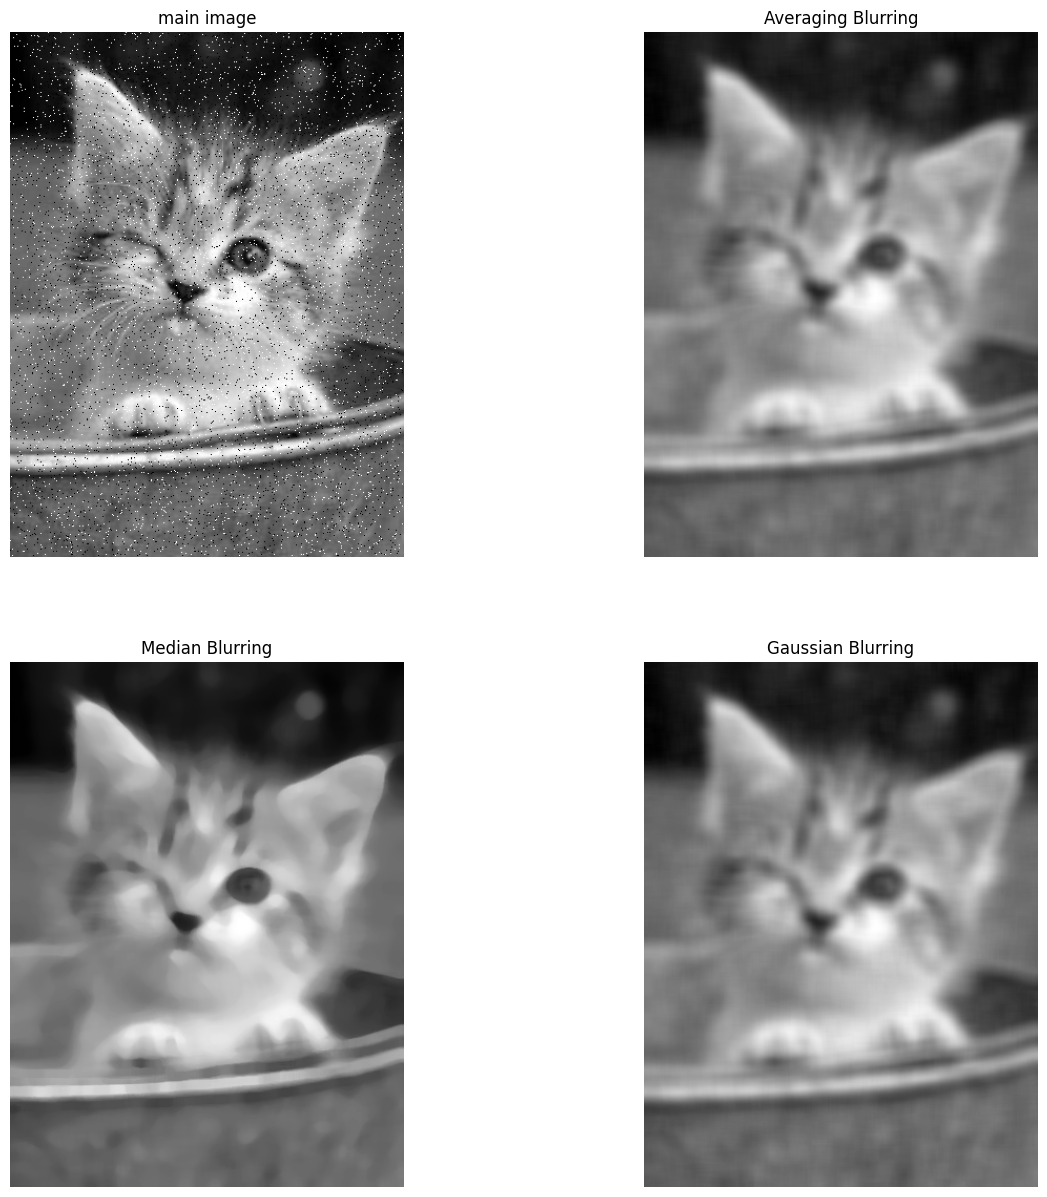

In [ ]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [ ]:
filter_size = (15, 15)
std = 40
AveragingBlurring = cv2.blur(image, filter_size) ## your code here ##
MedianBlurring = cv2.medianBlur(image, filter_size[0])  ## your code here ##
GaussianBlurring = cv2.GaussianBlur(image, filter_size, std) ## your code here ##

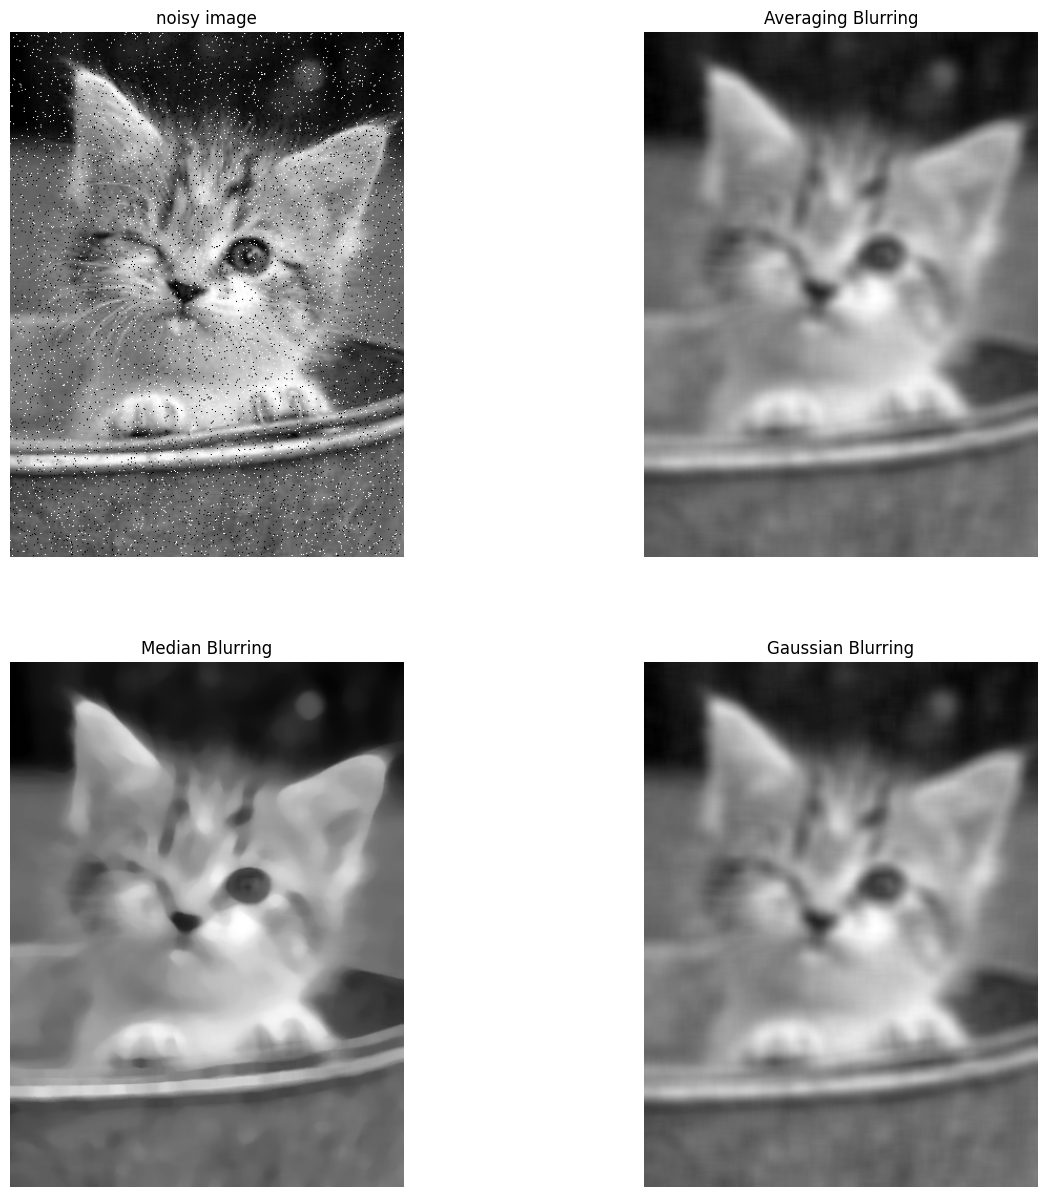

In [ ]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")